# ch09_RNN

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from torch import nn
from torch import optim

## 9.1 实践序列表示方法
#### word2vec v.s. GloVe

In [5]:
word_to_ix = {"hello":0, "world":1}
lookup_tensor = torch.tensor([word_to_ix["hello"]],dtype=torch.long)
embeds = nn.Embedding(2,5) # 2 words in vocab, 5 dimensional embeddings
hello_embed = embeds(lookup_tensor)
print('word2vec:')
print(hello_embed)

word2vec:
tensor([[ 1.3286, -0.3788,  0.2632,  0.4958, -0.6609]],
       grad_fn=<EmbeddingBackward>)


In [6]:
from torchnlp.word_to_vector import GloVe

In [7]:
vectors = GloVe()
print('Glove:')
print(vectors['hello'])

Glove:
tensor([ 0.2523,  0.1018, -0.6748,  0.2112,  0.4349,  0.1654,  0.4826, -0.8122,
         0.0413,  0.7850, -0.0779, -0.6632,  0.1464, -0.2929, -0.2549,  0.0193,
        -0.2026,  0.9823,  0.0283, -0.0813, -0.1214,  0.1313, -0.1765,  0.1356,
        -0.1636, -0.2257,  0.0550, -0.2031,  0.2072,  0.0958,  0.2248,  0.2154,
        -0.3298, -0.1224, -0.4003, -0.0794, -0.1996, -0.0151, -0.0791, -0.1813,
         0.2068, -0.3620, -0.3074, -0.2442, -0.2311,  0.0980,  0.1463, -0.0627,
         0.4293, -0.0780, -0.1963,  0.6509, -0.2281, -0.3031, -0.1248, -0.1757,
        -0.1465,  0.1536, -0.2952,  0.1510, -0.5173, -0.0336, -0.2311, -0.7833,
         0.0180, -0.1572,  0.0229,  0.4964,  0.0292,  0.0567,  0.1462, -0.1919,
         0.1624,  0.2390,  0.3643,  0.4526,  0.2456,  0.2380,  0.3140,  0.3487,
        -0.0358,  0.5611, -0.2535,  0.0520, -0.1062, -0.3096,  1.0585, -0.4202,
         0.1822, -0.1126,  0.4058,  0.1178, -0.1971, -0.0753,  0.0807, -0.0278,
        -0.1562, -0.4468, -0.1516

## 9.2 RNN原理

$$ h_t = f_W(h_{t-1},x_t) \\ \downarrow $$

$$ h_t = \tanh (W_{hh}h_{t-1} + W_{xh}x_t) $$
$$ y_t = W_{hy}h_t $$

## 9.3 RNN Layer 使用

In [9]:
rnn = nn.RNN(100,10) # 100:word dim 10:h
rnn._parameters.keys()

odict_keys(['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0'])

In [11]:
print('weight_ih:',rnn.weight_ih_l0.shape)
print('weight_hh:',rnn.weight_hh_l0.shape)
print('bias_ih:  ',rnn.bias_ih_l0.shape)
print('bias_hh:  ',rnn.bias_hh_l0.shape)

weight_ih: torch.Size([10, 100])
weight_hh: torch.Size([10, 10])
bias_ih:   torch.Size([10])
bias_hh:   torch.Size([10])


### nn.RNN

- \_\_init\_\_ :
 - **input_size** : The numbe of expected features in the input x
 - **hidden_size** : The number of features in the hidden state h
 - **num_layers** : Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results. Default:1
- out, ht = forward(x,h0)
 - x:[seq len, b, word vec]
 - ho/ht:[num layers, b, h dim]
 - out:[seq len, b, h dim]
 

#### 1 layer RNN

In [22]:
rnn = nn.RNN(input_size=100, hidden_size=20, num_layers=1)
print(rnn)
x = torch.randn(10,3,100)
out, h = rnn(x, torch.zeros(1,3,20))
print('out.shape: ',out.shape)
print('h.shape: ',h.shape)


RNN(100, 20)
out.shape:  torch.Size([10, 3, 20])
h.shape:  torch.Size([1, 3, 20])


#### 2 layers RNN

In [23]:
rnn = nn.RNN(100,10,num_layers=2)
print(rnn._parameters.keys())
print('rnn.weight_hh_l0.shape: ',rnn.weight_hh_l0.shape)
print('rnn.weight_ih_l0.shape: ',rnn.weight_ih_l0.shape)
print('rnn.weight_hh_l1.shape: ',rnn.weight_hh_l1.shape)
print('rnn.weight_ih_l1.shape: ',rnn.weight_ih_l1.shape)

odict_keys(['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0', 'weight_ih_l1', 'weight_hh_l1', 'bias_ih_l1', 'bias_hh_l1'])
rnn.weight_hh_l0.shape:  torch.Size([10, 10])
rnn.weight_ih_l0.shape:  torch.Size([10, 100])
rnn.weight_hh_l1.shape:  torch.Size([10, 10])
rnn.weight_ih_l1.shape:  torch.Size([10, 10])


In [24]:
print(rnn)
x = torch.randn(10,3,100,)
out,h = rnn(x,torch.zeros(2,3,10))
print('out.shape: ',out.shape)
print('h.shape: ',h.shape)

RNN(100, 10, num_layers=2)
out.shape:  torch.Size([10, 3, 10])
h.shape:  torch.Size([2, 3, 10])


### nn.RNNCell
- \_\_init\_\_:
 - **input_size** 
 - **hidden_size**  
 - **num_layers** 
 
- ht = rnncell(xt, ht_1)
 - xt:[b, word vec]
 - ht_1/ht: [num layers,b, h dim]
 - out = torch.stack([h1,h2,...,ht]
 
 #### 1 layer

In [29]:
cell_1 = nn.RNNCell(100,20)
x = torch.randn(10,3,100)
h1 = torch.zeros(3,20)
print(cell_1._parameters.keys())
for xt in x:
    h1 = cell_1(xt,h1)
print(h1.shape)


odict_keys(['weight_ih', 'weight_hh', 'bias_ih', 'bias_hh'])
torch.Size([3, 20])


#### 2 layers

In [30]:
cell1 = nn.RNNCell(100,30)
cell2 = nn.RNNCell(30,20)
h1 = torch.zeros(3,30)
h2 = torch.zeros(3,20)
x = torch.randn(10,3,100)

for x_t in x:
    h1 = cell1(x_t,h1)
    h2 = cell2(h1,h2)
print('h2.shape: ',h2.shape)



h2.shape:  torch.Size([3, 20])


## 9.4 实践序列预测实战

In [53]:
num_time_steps = 50
input_size=1
hidden_size=16
output_size = 1


class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.rnn = nn.RNN(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers=1,
            batch_first=True,
        )
        for p in self.rnn.parameters():
            nn.init.normal(p,mean=0.0,std=0.001)
            
        self.linear = nn.Linear(hidden_size,output_size)
        
    def forward(self,x,hidden_prev):
        out, hidden_prev = self.rnn(x,hidden_prev)
        # [1,seq,h] -> [seq,h]
        out = out.view(-1,hidden_size)
        out = self.linear(out) # [seq,h] -> [seq,1]
        out = out.unsqueeze(dim=0) # [1,seq,1]
        return out,hidden_prev

Iteration: 0 loss 0.600734293460846
Iteration: 100 loss 0.008353039622306824
Iteration: 200 loss 0.001920293434523046
Iteration: 300 loss 0.0005269499379210174
Iteration: 400 loss 0.0003123287169728428
Iteration: 500 loss 0.001031182357110083
Iteration: 600 loss 0.0015427361940965056
Iteration: 700 loss 0.0012392712524160743
Iteration: 800 loss 0.00013216763909440488
Iteration: 900 loss 0.001414975617080927
Iteration: 1000 loss 0.0016003549098968506
Iteration: 1100 loss 0.00019352202070876956
Iteration: 1200 loss 0.00025170683511532843
Iteration: 1300 loss 0.0006312616751529276
Iteration: 1400 loss 0.00028045018552802503
Iteration: 1500 loss 0.000212494982406497
Iteration: 1600 loss 0.0009795314399525523
Iteration: 1700 loss 0.0008050113683566451
Iteration: 1800 loss 0.0006047850474715233
Iteration: 1900 loss 0.0004544451949186623
Iteration: 2000 loss 0.0002742959768511355
Iteration: 2100 loss 0.0003964266797993332
Iteration: 2200 loss 0.0004026401729788631
Iteration: 2300 loss 0.00019

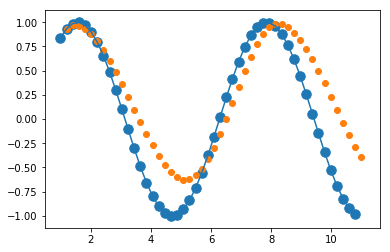

In [57]:
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=1e-2)
hidden_prev = torch.zeros(1,1,hidden_size) # h0

for iter in range(6000):
    start = np.random.randint(3,size=1)[0]  # random in [0,3)
    time_steps = np.linspace(start,start+10,num_time_steps)
    data = np.sin(time_steps)
    data = data.reshape(num_time_steps,1)
    x = torch.tensor(data[:-1]).float().view(1,num_time_steps-1,1) # 0~48
    y = torch.tensor(data[1:]).float().view(1,num_time_steps-1,1) # 预测1~49
    
    output,hidden_prev = model(x,hidden_prev)
    hidden_prev = hidden_prev.detach()
    
    loss = criterion(output,y)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    if iter%100 == 0:
        print('Iteration: {} loss {}'.format(iter,loss.item()))

        
        
start = np.random.randint(3,size=1)[0]  # random in [0,3)
time_steps = np.linspace(start,start+10,num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps,1)
x = torch.tensor(data[:-1]).float().view(1,num_time_steps-1,1) # 0~48
y = torch.tensor(data[1:]).float().view(1,num_time_steps-1,1) # 预测1~49

predictions = []
input = x[:,0,:]
for _ in range(x.shape[1]):
    input = input.view(1,1,1)
    (pred,hidden_prev) = model(input,hidden_prev)
    input = pred
    predictions.append(pred.detach().numpy().ravel()[0])


x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1],x.ravel(),s=90)
plt.plot(time_steps[:-1],x.ravel())

plt.scatter(time_steps[1:],predictions)
plt.show()